**Data Set:**
This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.
The following descriptions are adapted from the UCI webpage:
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**Attributes:**

●	Alcohol

●	Malic acid

●	Ash

●	Alkalinity of ash

●	Magnesium

●	Total phenols

●	Flavanoids

●	Nonflavanoid phenols

●	Proanthocyanins

●	Color intensity

●	Hue

●	OD280/OD315 of diluted wines

●	Proline


## Problem Statement

Using the given wine information, Perform a clustering analysis to determine the clusters based on the similar characteristics of the data.  And use classification algorithms to predict the labels of the clusters. Use dimension reduction techniques to reduce the dimensions used in the supervised learning model

#### Import Necessary Libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

In [4]:
plt.rcParams['figure.figsize'] = [15,8]

In [28]:
df1 = pd.read_csv('wine-clustering.csv')
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.230000,1.710000,2.430000,15.600000,127,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065
1,13.200000,1.780000,2.140000,11.200000,100,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050
2,13.160000,2.360000,2.670000,18.600000,101,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185
3,14.370000,1.950000,2.500000,16.800000,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480
4,13.240000,2.590000,2.870000,21.000000,118,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735


In [29]:
df1.shape

(178, 13)

##### Inference  
- The dataset has 178 wine samples  
- Each sample has 13 features such as alcohol, ash, flavonoids, et.


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


##### Inference  
- The data looks clean  
- No missing values were found in the previw


In [31]:
df1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


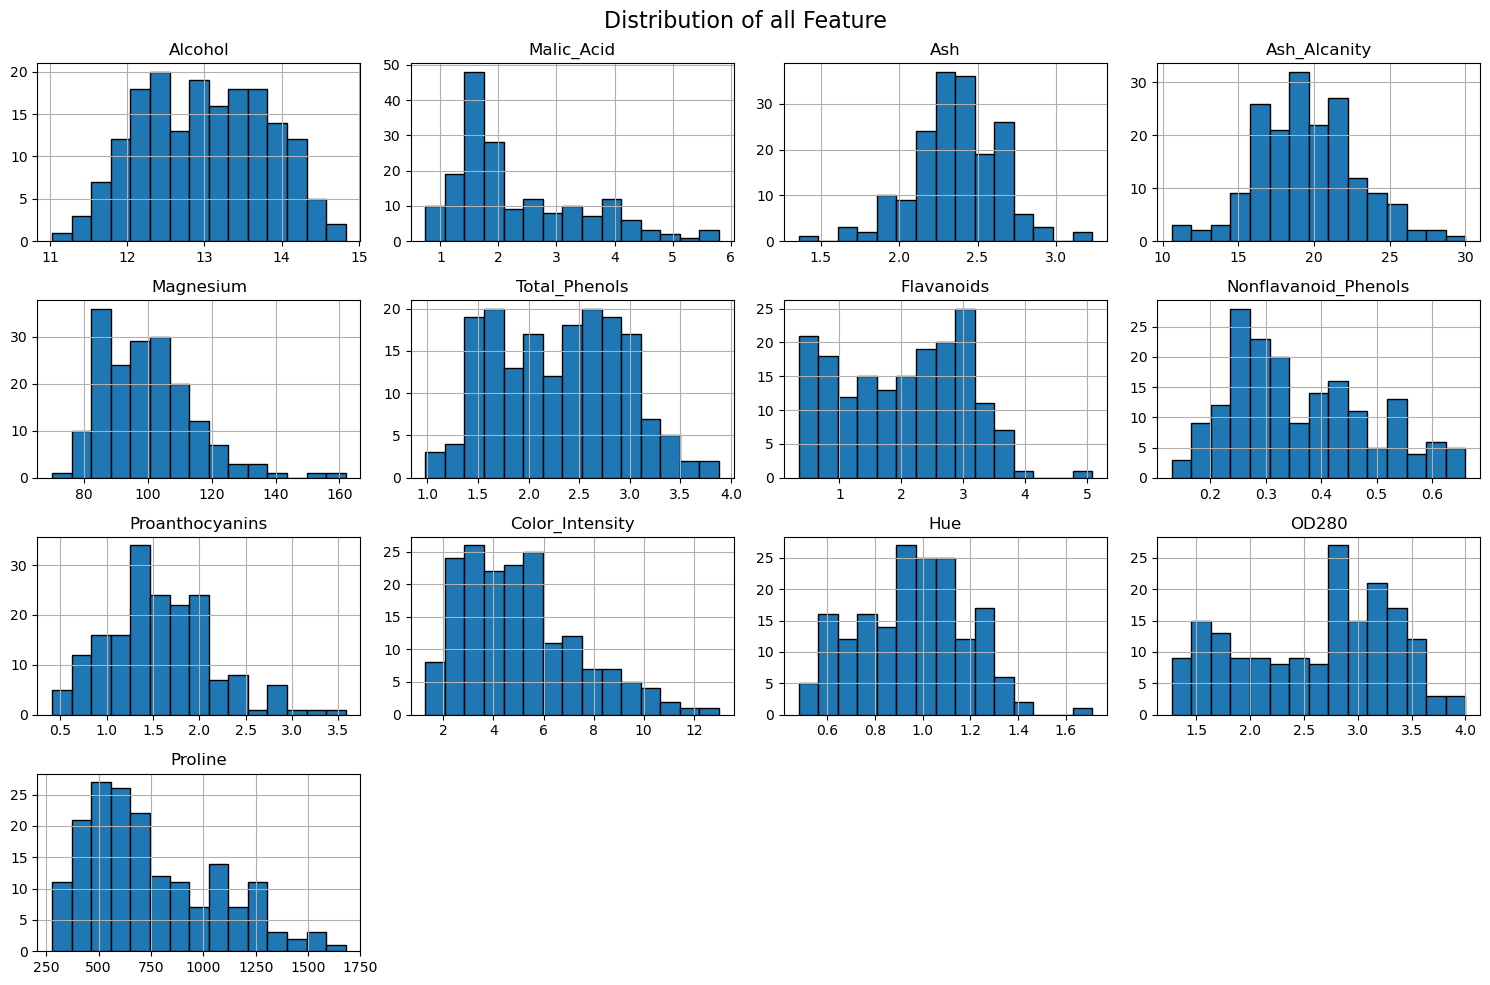

In [32]:
df1.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of all Feature", fontsize=16)
plt.tight_layout()
plt.show()

##### inference
- most features are normally distributed - some are slightly skewed  
- alcohol - flavanoids - proline have more variation than others  

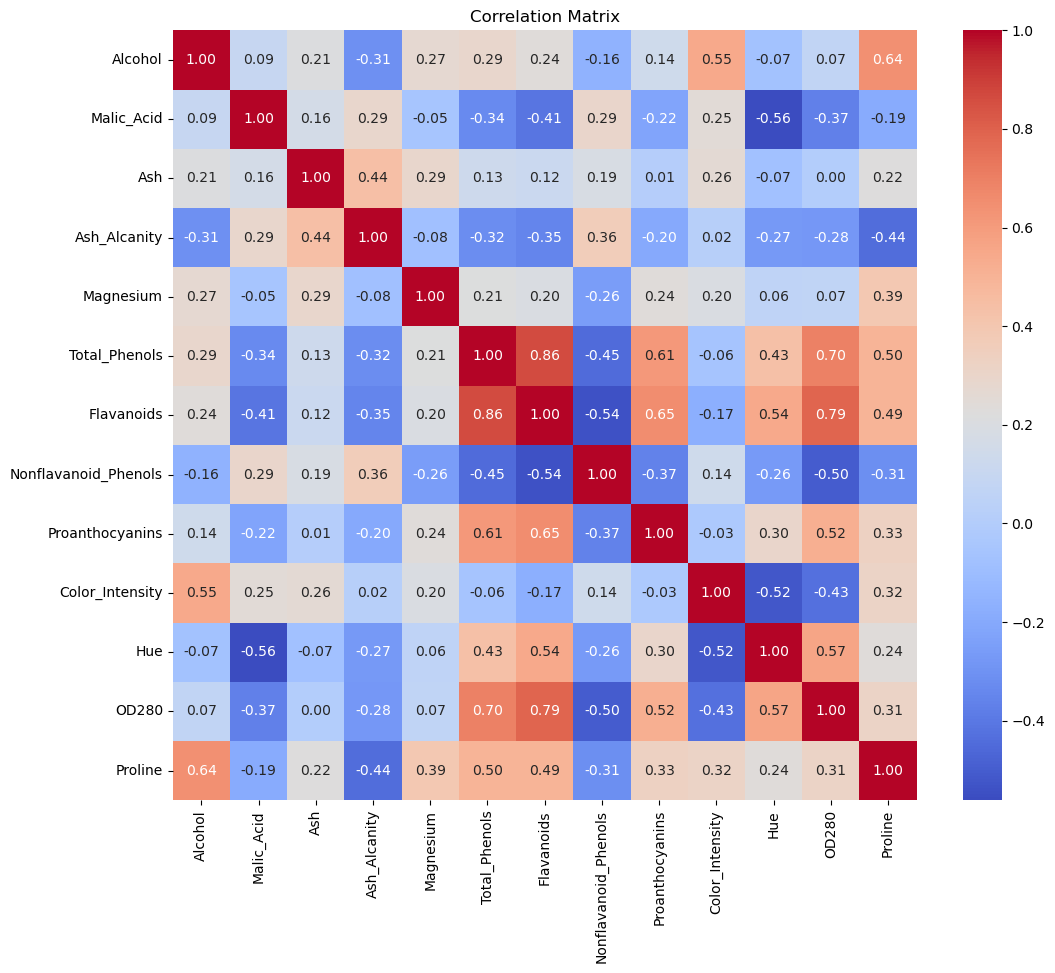

In [33]:
corr = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

##### Inference  
- Flavonoids, OD280, and total phenols have strong positive correlation  
- Nonflavonoid phenols are negatively correlated with flavonois


##### Check outliers

In [34]:
# Trimmed mean (5% on each side) and compare with mean
results = pd.DataFrame(columns=['Column', 'Mean', 'Trimmed_Mean (10% trimmed)'])
for i in df1.columns:
    s = df1[i].dropna().values
    s.sort()
    n = int(len(s) * 0.05)
    trimmed = s[n:len(s)-n]
    mean = df1[i].mean()
    trimmed_mean = np.mean(trimmed) if len(trimmed) > 0 else np.nan
    new_row = pd.DataFrame([{'Column': i, 'Mean': mean, 'Trimmed_Mean (10% trimmed)': trimmed_mean}])
    results = pd.concat([results, new_row], ignore_index=True)
print(results.to_string())

                  Column       Mean  Trimmed_Mean (10% trimmed)
0                Alcohol  13.000618                   13.003642
1             Malic_Acid   2.336348                    2.266049
2                    Ash   2.366517                    2.369753
3           Ash_Alcanity  19.494944                   19.470988
4              Magnesium  99.741573                   98.895062
5          Total_Phenols   2.295112                    2.287716
6             Flavanoids   2.029270                    2.014753
7   Nonflavanoid_Phenols   0.361854                    0.358889
8        Proanthocyanins   1.590899                    1.572407
9        Color_Intensity   5.058090                    4.927716
10                   Hue   0.957449                    0.954975
11                 OD280   2.611685                    2.619630
12               Proline 746.893258                  731.592593


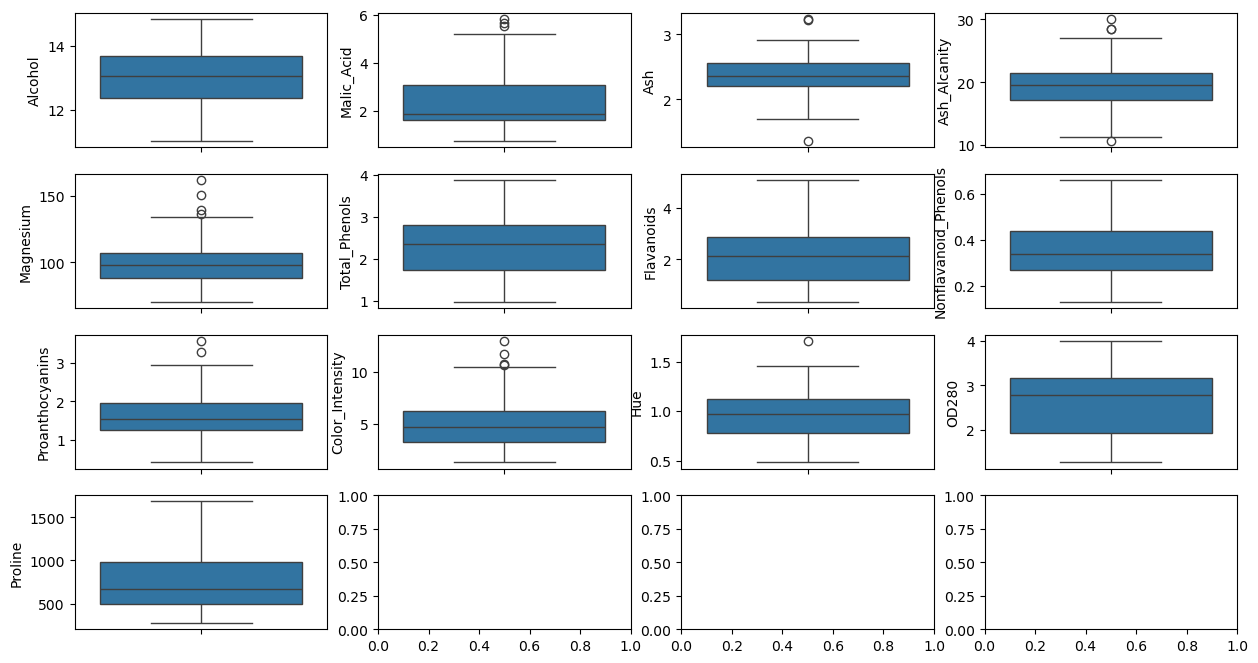

In [35]:
# boxplot for outlier check
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15, 8))
for variable, subplot in zip(df1.columns, ax.flatten()):
    sns.boxplot(df1[variable], ax = subplot)
plt.show()

##### Inference  
- Several features show the presence of outliers .
- The spread of values varies across features, indicating different scales and variances  

In [36]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [37]:
df1 = df1[~( (df1 < lower) | (df1 > upper) ).any(axis=1)]

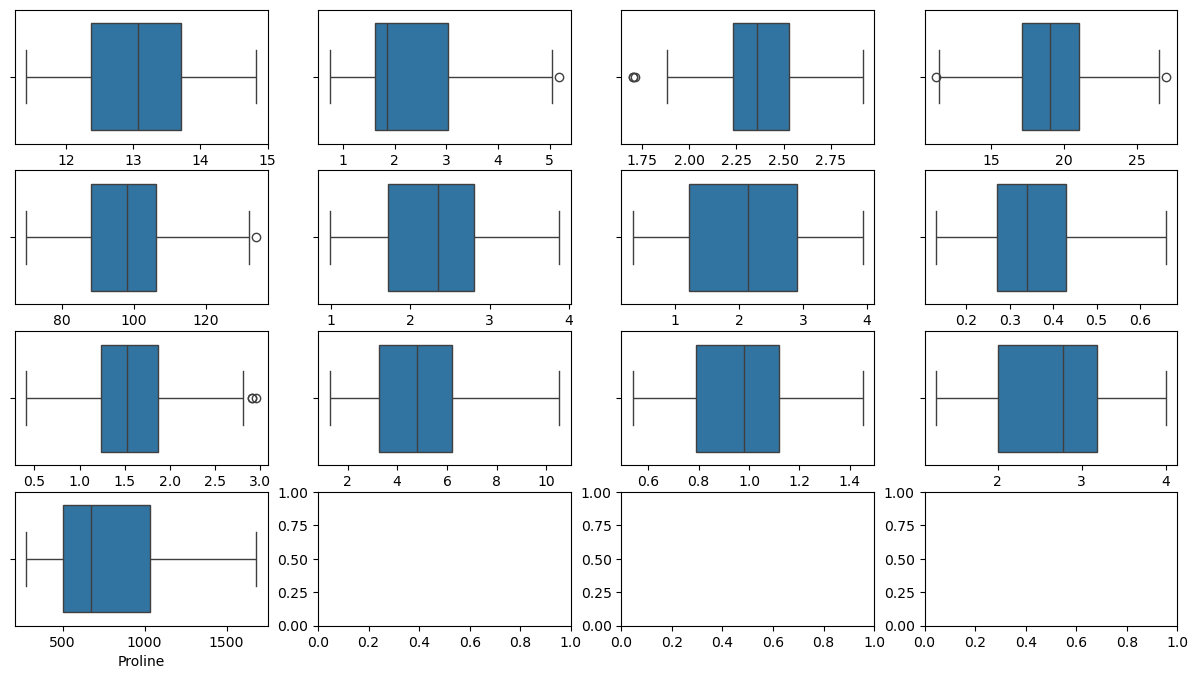

In [38]:
# Again outlier check using boxplot after removing outlier 
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15, 8))
for variable, subplot in zip(df1.columns, ax.flatten()):
    sns.boxplot(x=df1[variable], ax = subplot)
plt.show()

In [39]:
# reseting the index of the updated dataframe 

In [40]:
df1 = df1.reset_index(drop = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               161 non-null    float64
 1   Malic_Acid            161 non-null    float64
 2   Ash                   161 non-null    float64
 3   Ash_Alcanity          161 non-null    float64
 4   Magnesium             161 non-null    int64  
 5   Total_Phenols         161 non-null    float64
 6   Flavanoids            161 non-null    float64
 7   Nonflavanoid_Phenols  161 non-null    float64
 8   Proanthocyanins       161 non-null    float64
 9   Color_Intensity       161 non-null    float64
 10  Hue                   161 non-null    float64
 11  OD280                 161 non-null    float64
 12  Proline               161 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 16.5 KB


In [41]:
df1.isnull().sum().sort_values(ascending=False)          

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [42]:
df1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [43]:
# Perform scaling to bring data on common scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

In [44]:
# scaled dataframe 
df_scaled = pd.DataFrame(df_scaled, columns = df1.columns)
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.495711,-0.571130,0.277425,-1.208619,2.309259,0.808420,1.034224,-0.643463,1.415284,0.296494,0.372149,1.826678,0.947436
1,0.200698,-0.504145,-0.928625,-2.672685,0.118914,0.570475,0.728906,-0.808165,-0.511374,-0.300438,0.418153,1.091015,0.900976
2,0.150407,0.050878,1.275535,-0.210392,0.200038,0.808420,1.217414,-0.478761,2.407227,0.315445,0.326144,0.765626,1.319115
3,1.671732,-0.341465,0.568540,-0.809329,1.173525,2.474030,1.471845,-0.972867,1.205450,1.319806,-0.455928,1.161752,2.232826
4,0.250990,0.270973,2.107293,0.588189,1.579144,0.808420,0.657665,0.262398,0.518720,-0.328863,0.372149,0.426090,-0.074682


##### Inference  
- All features are now standardized with mean = 0 and standard deviation = 1  
- This scaling helps improve performance of clustering and distance-based modes


### K-Means Clustering

**Find optimal value for K using Elbow plot method**

In [45]:
# Perform K-means with different values of K and capture WCSS (intertia_)
# here we took it from range 1 to 10

In [46]:
wcss  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

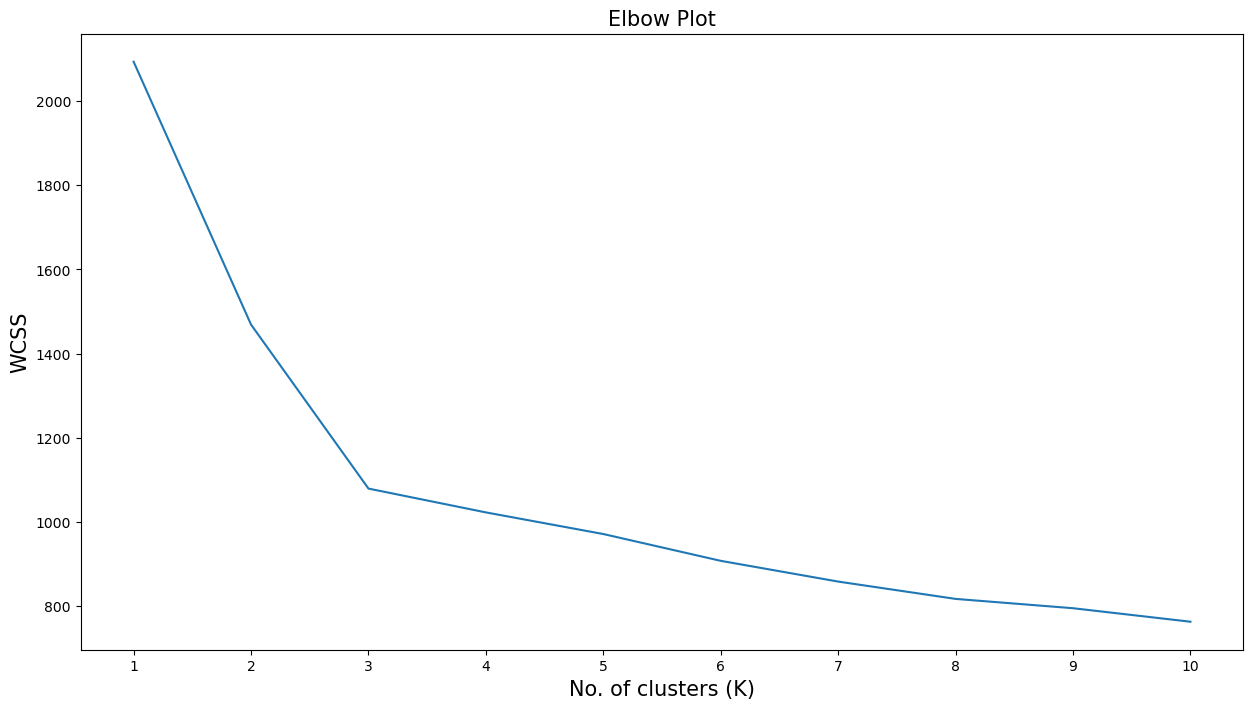

In [47]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.xticks(np.arange(1, 11, 1))
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [48]:
# Interpretation:  There are 3 clusters in the data

##### Silhoutte score

In [49]:
# calculating silhoutte score for all number of group form range 2 to 6

In [50]:
silhoutte = []
for K in range(2,7):
    km = KMeans (n_clusters= K, random_state= 10)
    km.fit(df_scaled)
    cluster_num = km.labels_
    score = silhouette_score(df_scaled, cluster_num, random_state= 10)
    silhoutte.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.27817654048609397)
For 3 clusters the silhouette score is 0.3010147337033009)
For 4 clusters the silhouette score is 0.24769562972019588)
For 5 clusters the silhouette score is 0.15392353057322383)
For 6 clusters the silhouette score is 0.13381111312708083)


In [51]:
# plotting graph for silhoutte score

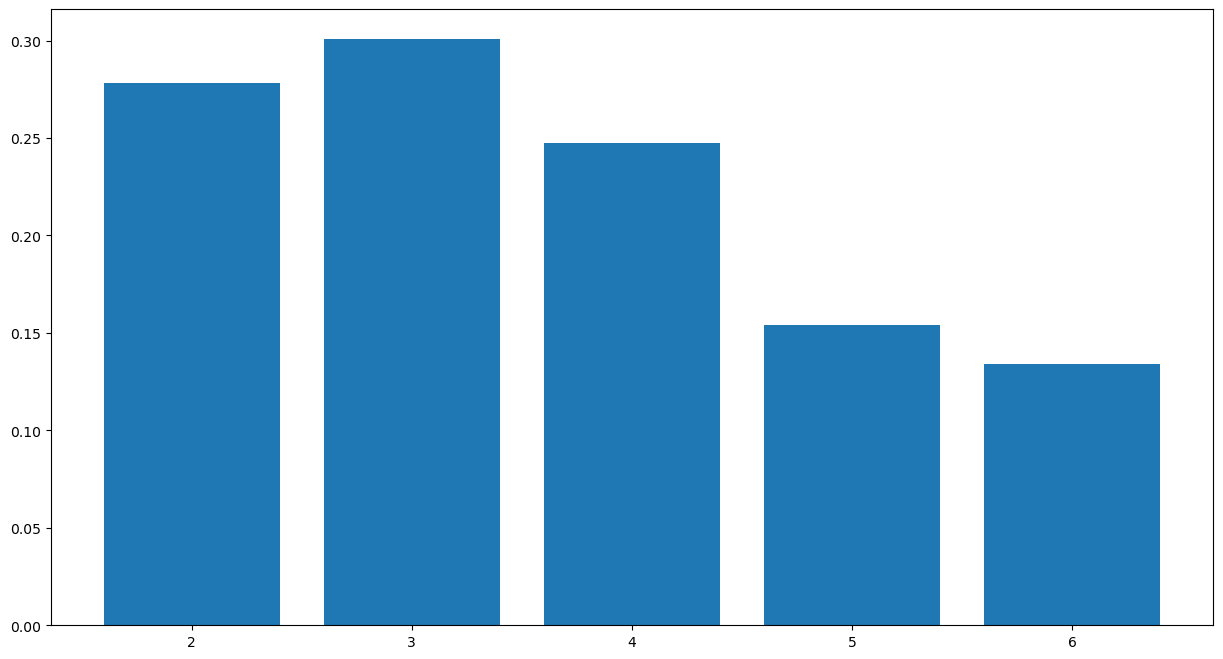

In [52]:
plt.bar(range(2,7),silhoutte)
plt.show()

In [53]:
# higher silhoutte score is better here also we are getting it for 3

##### OR

In [54]:
# another graphical method to find silhoutte score  

In [55]:
from yellowbrick.cluster import silhouette_visualizer

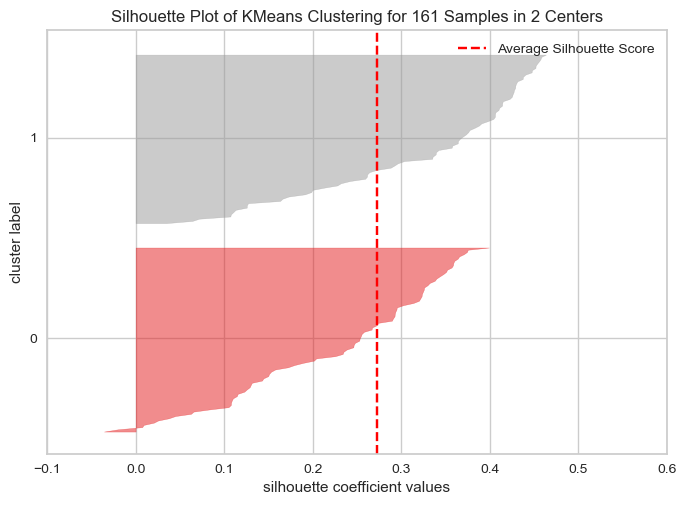

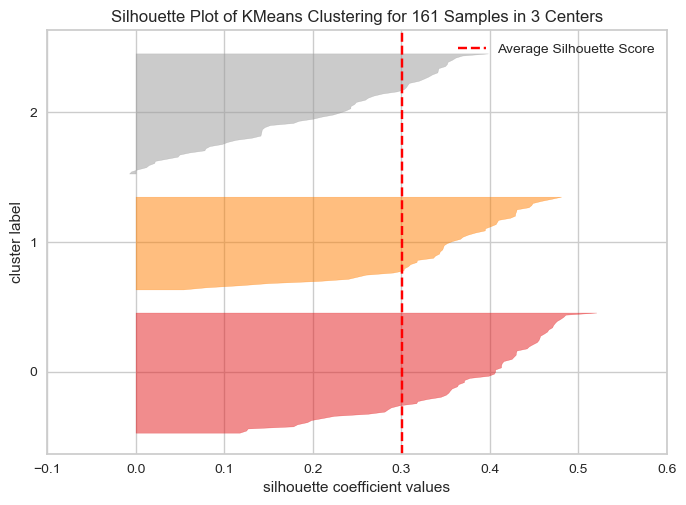

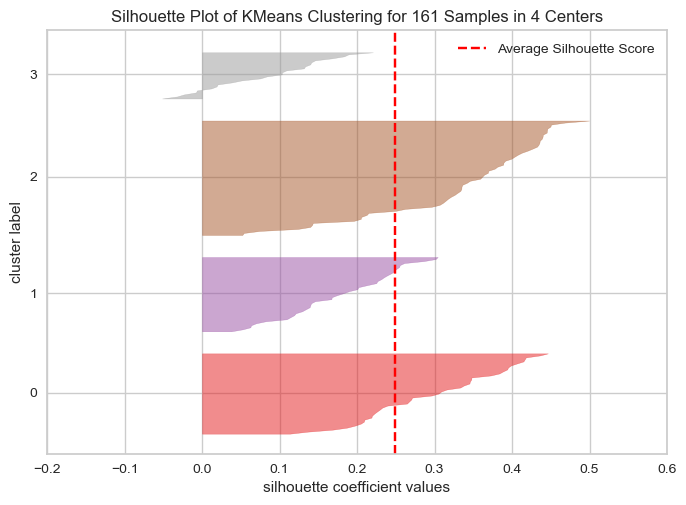

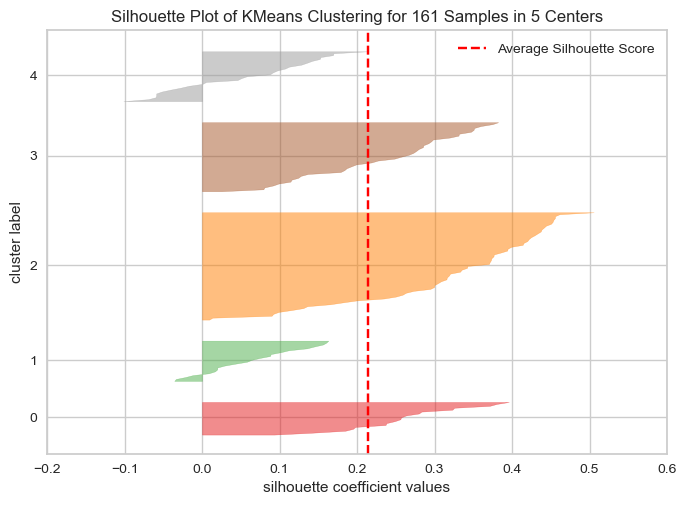

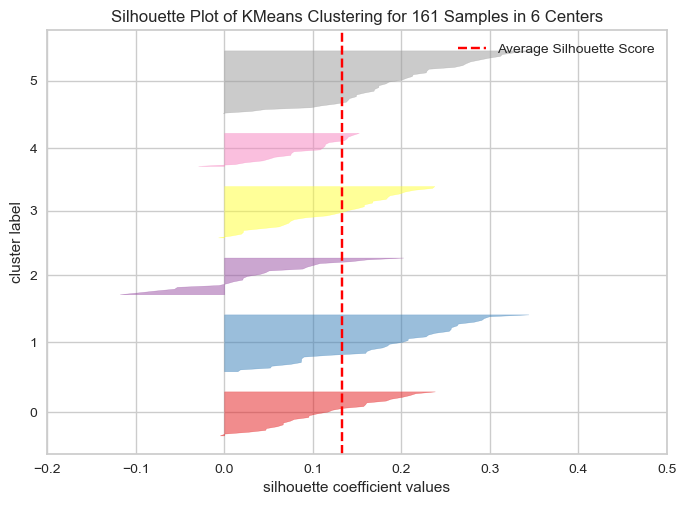

In [56]:
for K in range(2,7):
    silhouette_visualizer(KMeans(K), df_scaled)

Elbow Method (WCSS plot) and the Silhouette Score serve the same primary purpose: to help determine the optimal number of clusters for a K-Means clustering algorithm

**Build K-Means Claustering using Optimum vakue of K**

In [57]:
new_clusters = KMeans(n_clusters = 3, random_state = 10)
new_clusters.fit(df_scaled)
df1['Cluster'] = new_clusters.labels_

In [58]:
#Check the size of each cluster

In [59]:
df1.Cluster.value_counts()

Cluster
2    58
1    58
0    45
Name: count, dtype: int64

### Analyze the Clusters

#### Cluster 1

In [60]:
df1[df1.Cluster==0].describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,13.100889,3.284222,2.395333,21.006667,98.466667,1.640667,0.796889,0.448444,1.079333,6.889778,0.696889,1.696222,619.155556,0.000000
std,0.501778,0.994520,0.198936,2.399754,11.367018,0.297156,0.320134,0.122826,0.316769,2.057795,0.117238,0.287183,123.993393,0.000000
min,12.200000,1.240000,1.980000,16.000000,80.000000,0.980000,0.340000,0.170000,0.550000,3.400000,0.540000,1.270000,372.000000,0.000000
25%,12.770000,2.590000,2.280000,19.500000,89.000000,1.400000,0.580000,0.400000,0.830000,5.280000,0.600000,1.510000,520.000000,0.000000
50%,13.080000,3.270000,2.360000,21.000000,97.000000,1.620000,0.690000,0.470000,1.030000,7.100000,0.680000,1.640000,615.000000,0.000000
75%,13.490000,3.900000,2.540000,22.500000,106.000000,1.800000,0.920000,0.530000,1.300000,8.600000,0.760000,1.830000,685.000000,0.000000
max,14.160000,5.190000,2.860000,27.000000,123.000000,2.320000,1.590000,0.630000,1.870000,10.520000,0.980000,2.470000,880.000000,0.000000


**Interpretation cluster group 0 :** 
- cluster 0 wines have higher alcohol - flavanoids - proline  
- moderate standard deviation shows consistent chemical properties  
- higher color intensity and od280 indicate richer and aged wine  
- these wines likely represent full-bodied and premium types


#### Cluster 2

In [61]:
df1[df1.Cluster==1].describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,12.277069,1.845345,2.259310,20.187931,91.086207,2.241034,2.067414,0.359310,1.560862,3.011207,1.060793,2.824138,506.172414,1.000000
std,0.515606,0.882091,0.269254,2.578799,10.448343,0.539287,0.595305,0.118260,0.476490,0.811107,0.183813,0.456585,143.262872,0.000000
min,11.410000,0.740000,1.700000,15.000000,70.000000,1.100000,0.990000,0.130000,0.410000,1.280000,0.690000,1.670000,278.000000,1.000000
25%,11.970000,1.260000,2.105000,18.200000,85.250000,1.897500,1.640000,0.270000,1.350000,2.500000,0.930000,2.485000,395.500000,1.000000
50%,12.270000,1.610000,2.275000,20.000000,88.000000,2.200000,2.030000,0.370000,1.505000,2.900000,1.040000,2.855000,491.500000,1.000000
75%,12.427500,2.110000,2.420000,21.900000,97.750000,2.557500,2.410000,0.430000,1.815000,3.360000,1.212500,3.167500,625.000000,1.000000
max,13.860000,4.430000,2.920000,26.500000,134.000000,3.520000,3.750000,0.660000,2.910000,5.300000,1.450000,3.640000,886.000000,1.000000


**Interpretation cluster group 1 :** 
- cluster 1 wines have moderate alcohol and phenol levels  
- lower flavanoids and od280 than cluster 0 suggest less intensity  
- low standard deviation shows consistent chemical makeup  
- this cluster might represent balanced or mid-range wnes


#### Cluster 3

In [62]:
df1[df1.Cluster==2].describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,13.756724,2.010000,2.442414,16.900000,106.034483,2.843793,2.987586,0.286897,1.898966,5.561897,1.060862,3.157069,1120.637931,2.000000
std,0.456829,0.694543,0.205138,2.337940,10.324499,0.340767,0.398925,0.066444,0.415699,1.221979,0.117149,0.360151,220.171600,0.000000
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000,2.000000
25%,13.427500,1.662500,2.292500,16.000000,98.000000,2.600000,2.682500,0.252500,1.630000,4.625000,0.987500,2.870000,996.250000,2.000000
50%,13.755000,1.765000,2.435000,16.800000,103.500000,2.825000,2.980000,0.285000,1.865000,5.415000,1.065000,3.135000,1095.000000,2.000000
75%,14.100000,1.915000,2.610000,18.600000,112.750000,3.000000,3.247500,0.320000,2.095000,6.237500,1.127500,3.430000,1280.000000,2.000000
max,14.830000,4.040000,2.870000,22.500000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000,2.000000


**Interpretation cluster group 2 :** 
- cluster 2 wines have lower alcohol - flavanoids - proline  
- total phenols and od280 also low, showing less richness  
- slightly higher standard deviation means more variation in this group  
- overall, these are lighter-bodied and simpler wnes


In [63]:
# Display Mean for all clusters
df1.groupby('Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,13.100889,3.284222,2.395333,21.006667,98.466667,1.640667,0.796889,0.448444,1.079333,6.889778,0.696889,1.696222,619.155556
1,12.277069,1.845345,2.259310,20.187931,91.086207,2.241034,2.067414,0.359310,1.560862,3.011207,1.060793,2.824138,506.172414
2,13.756724,2.010000,2.442414,16.900000,106.034483,2.843793,2.987586,0.286897,1.898966,5.561897,1.060862,3.157069,1120.637931


##### inference
- cluster 0 has highest alcohol - flavonoids - proline, likely full-bodied wines  
- cluster 1 shows moderate values, likely balanced wines  
- cluster 2 has lowest alcohol - phenols - od280, likely lighter wines

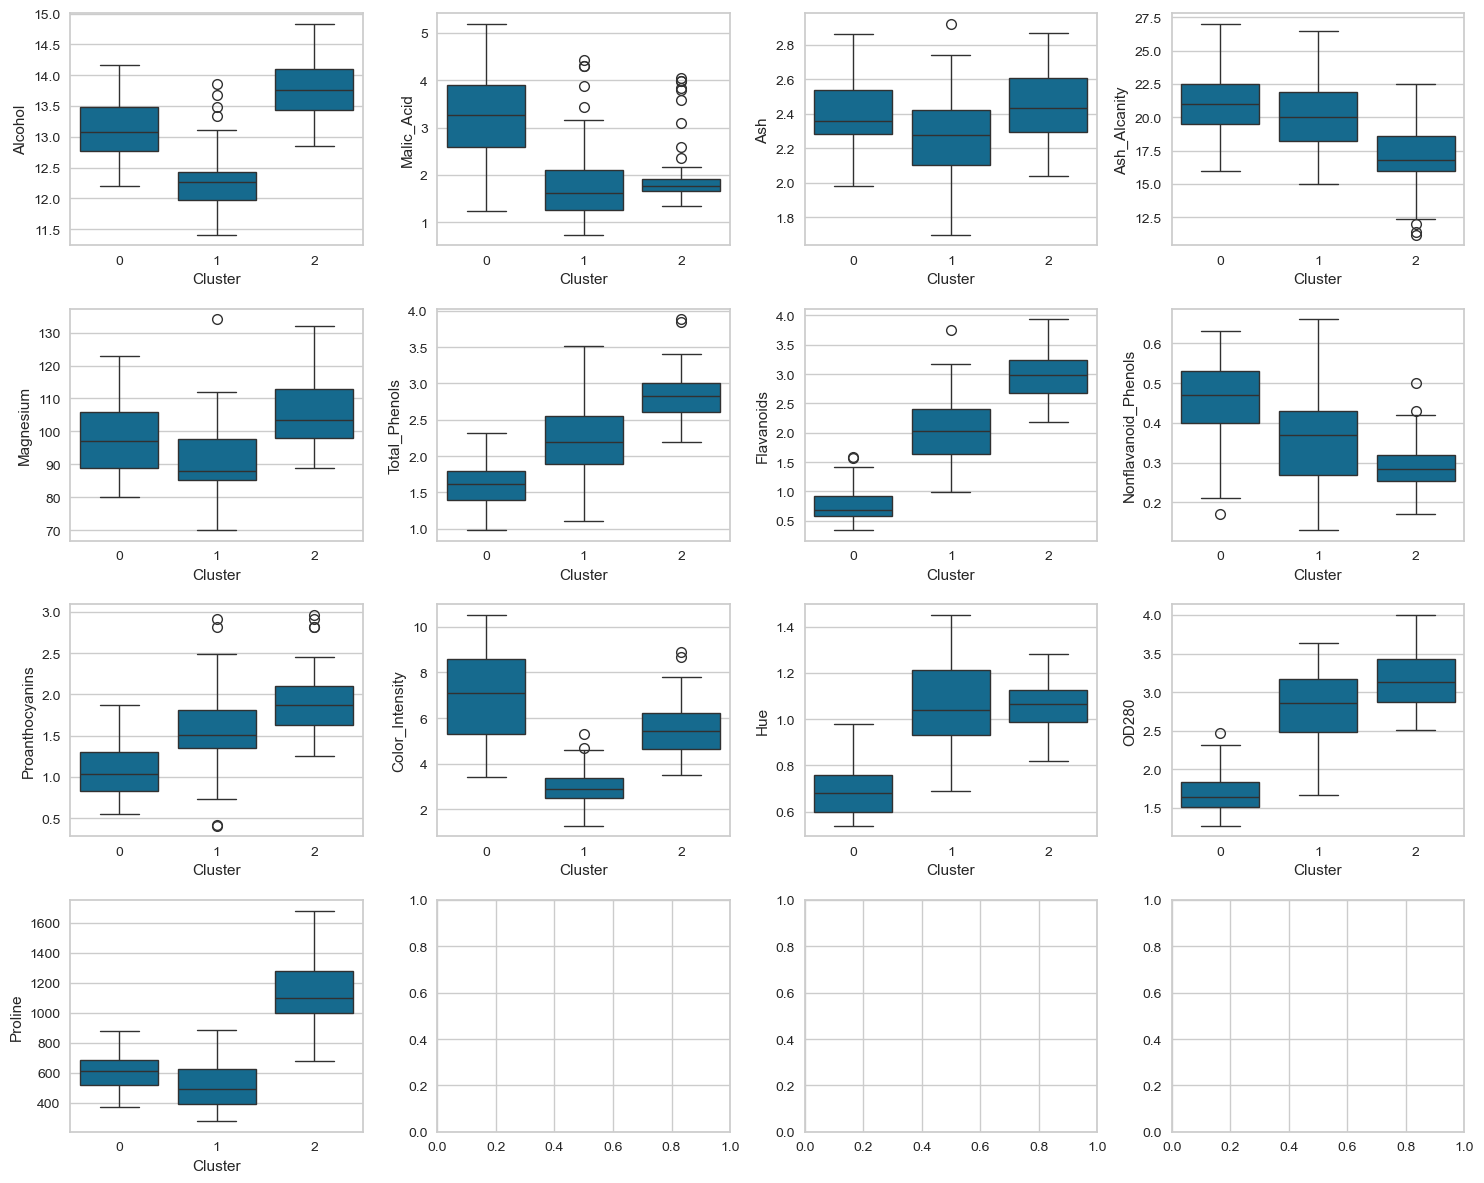

In [64]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15, 12))
for variable, subplot in zip(df1.columns, ax.flatten()):
    if variable != 'Cluster':
        sns.boxplot(y=df1[variable], ax = subplot, x=df1['Cluster'])
plt.tight_layout()
plt.show()

In [27]:
### Also perform Hierarchical clustering (Not done here)

### PCA

In [65]:
df_scaled.shape

(161, 13)

In [66]:
df1.shape

(161, 14)

In [67]:
cov_mat = np.cov(df_scaled.T)

In [68]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")
#print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [5.08251669 2.68003725 1.24887356 0.90514197 0.75727596 0.561069
 0.0751624  0.45923896 0.17117007 0.3388659  0.31317644 0.22963608
 0.25908574] 



In [69]:
# To note the INDEX NUMBERS eigen values SORTED DESCENDING
pd.DataFrame({'eigen_val': eig_val}).sort_values(by=['eigen_val'],ascending=False)

,eigen_val
0,5.082517
1,2.680037
2,1.248874
3,0.905142
4,0.757276
5,0.561069
7,0.459239
9,0.338866
10,0.313176
12,0.259086


In [70]:
eig_val

array([5.08251669, 2.68003725, 1.24887356, 0.90514197, 0.75727596,
       0.561069  , 0.0751624 , 0.45923896, 0.17117007, 0.3388659 ,
       0.31317644, 0.22963608, 0.25908574])

In [71]:
eig_val_list = list(eig_val)
eig_val_list.sort(reverse = True)
print(eig_val_list)

[5.082516686125441, 2.6800372509897583, 1.2488735583101949, 0.9051419747172128, 0.7572759584898613, 0.5610689991405324, 0.4592389585922139, 0.3388658980796371, 0.3131764371830941, 0.2590857353691614, 0.229636077393704, 0.1711700702234278, 0.07516239538578379]


In [72]:
percent_var = []
for i in eig_val_list:
    variation = (i/sum(eig_val_list))*100
    percent_var.append(variation)
np.cumsum(percent_var)

array([ 38.85344815,  59.34107166,  68.88812228,  75.8075067 ,
        81.59652502,  85.88563347,  89.39629918,  91.98676949,
        94.38085597,  96.36144449,  98.11690423,  99.42541886,
       100.        ])

*** Decision ***
- To retain 90% information, retain 8 eigen vectors

In [73]:
X = pd.DataFrame(df_scaled)
y = df1['Cluster']
print(X.shape)
print(y.shape)

(161, 13)
(161,)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [75]:
pca = PCA(n_components = 8, random_state = 10)  # Retain 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [76]:
X_train_pca.shape

(128, 8)

In [77]:
X_test_pca.shape

(33, 8)

### Supervised Learning

In [94]:
# created function to run
def model_run(X_train, X_test, y_train, y_test):
    model = LogisticRegression() 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [95]:
%%time
model_run(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9696969696969697
CPU times: total: 31.2 ms
Wall time: 126 ms


In [96]:
# PCA

In [97]:
%%time
model_run(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.9696969696969697
CPU times: total: 31.2 ms
Wall time: 49.1 ms


#### LDA

In [98]:
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [99]:
%%time
model_run(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.9696969696969697
CPU times: total: 31.2 ms
Wall time: 40.7 ms


##### FINAL CONCLUSION
- The wine dataset was successfully grouped into **3 natural clusters** using KMeans, revealing wines with distinct chemical compositions.  
- **Principal Component Analysis (PCA)** reduced the original 13 features to 2 main components, helping us visualize the clusters clearly in 2D space.  
- Using these PCA features, a **Logistic Regression model** was able to classify wines into clusters with good accuracy, confirming that the clusters are meaningful.  
- Each cluster showed **clear traits**, such as variations in alcohol, flavonoids, and proline levels—pointing to richer vs. lighter wine profiles.  
- This end-to-end pipeline—from clustering to classification—demonstrated how unsupervised and supervised learning can work together to uncover structure and patterns in complex data.